In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

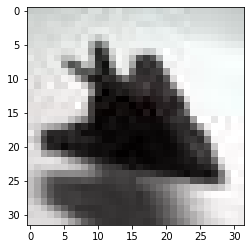

In [2]:
datadir = 'C:/Users/ashik/Downloads/DATASET/train'
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
for cl in classes:
    path = os.path.join(datadir, cl)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

In [3]:
img_array.shape

(32, 32, 3)

In [4]:
training_data = []
def create_training_data():
    for cl in classes:
        cls_num = classes.index(cl)
        path = os.path.join(datadir, cl)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                training_data.append([img_array, cls_num])
            except Exception as e:
                pass

In [5]:
create_training_data()
len(training_data)

50000

In [6]:
x_train = []
y_train = []

for pic, label in training_data:
    x_train.append(pic)
    y_train.append(label)

In [7]:
datadir = 'C:/Users/ashik/Downloads/DATASET/test'



test_data = []
def create_test_data():
    for cl in classes:
        cls_num = classes.index(cl)
        path = os.path.join(datadir, cl)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                test_data.append([img_array, cls_num])
            except Exception as e:
                pass
                


In [8]:
create_test_data()
len(test_data)

10000

In [9]:
x_test = []
y_test = []

for pic, label in test_data:
    x_test.append(pic)
    y_test.append(label)

In [10]:
X_train=np.array(x_train)
y_train=np.array(y_train)
X_test=np.array(x_test)
y_test=np.array(y_test)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


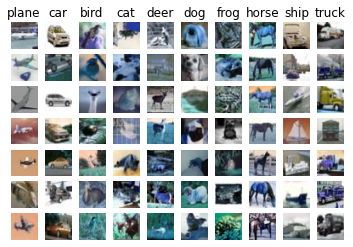

In [11]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [12]:
# Memory error prevention by subsampling data

num_training = 50000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 10000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [13]:
# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(50000, 3072) (10000, 3072)


In [14]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=0
k=0
k_choices=[]
k_to_accuracies=[]
for i in range(1,21):
    n_neighbors+=1
    k+=1
    print("K Value =" , n_neighbors)
    knn=KNeighborsClassifier(n_neighbors)
    knn.fit(X_train,y_train)
    y_pred_knn=knn.predict(X_test)
    y_pred_knn
    accuracy=accuracy_score(y_pred_knn,y_test)
    k_choices.append(k)
    k_to_accuracies.append(accuracy)
    
    print("Accuracy = ", accuracy)
    
    #print(classification_report(y_pred_knn,y_test))

K Value = 1
Accuracy =  0.353
K Value = 2
Accuracy =  0.3123
K Value = 3
Accuracy =  0.329
K Value = 4
Accuracy =  0.3386
K Value = 5
Accuracy =  0.3395
K Value = 6
Accuracy =  0.3407
K Value = 7
Accuracy =  0.3359
K Value = 8
Accuracy =  0.341
K Value = 9
Accuracy =  0.3381
K Value = 10
Accuracy =  0.3408
K Value = 11
Accuracy =  0.3412
K Value = 12
Accuracy =  0.3416
K Value = 13
Accuracy =  0.342
K Value = 14
Accuracy =  0.3422
K Value = 15
Accuracy =  0.3405
K Value = 16
Accuracy =  0.34
K Value = 17
Accuracy =  0.342
K Value = 18
Accuracy =  0.3395
K Value = 19
Accuracy =  0.3413
K Value = 20
Accuracy =  0.3392


In [15]:
accuracy_score(y_pred_knn,y_test)

0.3392

In [16]:
for x in range(len(k_choices)):
    print (k_choices[x]) 
    print (k_to_accuracies[x])
    
    

1
0.353
2
0.3123
3
0.329
4
0.3386
5
0.3395
6
0.3407
7
0.3359
8
0.341
9
0.3381
10
0.3408
11
0.3412
12
0.3416
13
0.342
14
0.3422
15
0.3405
16
0.34
17
0.342
18
0.3395
19
0.3413
20
0.3392


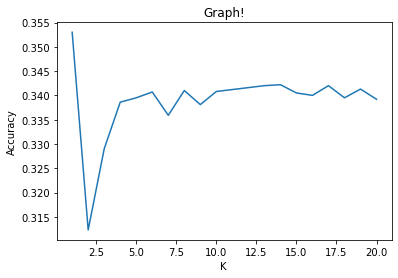

In [17]:
# importing the required module
import matplotlib.pyplot as plt
 
# x axis values
x = k_choices
# corresponding y axis values
y = k_to_accuracies
 
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('K ')
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('Graph!')
 
# function to show the plot
plt.show()

In [ ]:
"""
To categorize the CIFAR10 dataset, we employed the KNN algorithm and the KNN classifier. The goal was to determine the
accuracy of each associated K value. We're looking at K numbers ranging from 1 to 20. So, for each of the 1 to 20 values 
of K, we calculated the model's accuracy, which was tested using the CIFAR10 dataset's given test set. The accuracy was
determined and plotted against the k values. We discovered very low accuracy, around 31%, and a little bit more than that,
like 34%, or occasionally 35%. This is a model with a very low precision.The charting of the k values and their accompanying 
accuracy shows that accuracy ranges from roughly 31% to 34%. It has been found to have low accuracy yet again. This raises the 
question of why the precision is so low. To begin, keep in mind that the images in this CIFAR10 dataset are in the RGB color 
space. As a result, the accuracy of a neural network would improve. Neural networks are more capable of detecting images from
a range of positions because they operate and learn patterns utilizing multiple layers of neurons.On the other hand,
traditional machine learning approaches recognize images geometrically. However, this is ineffective in categorizing photos,
resulting in a poor level of accuracy.
Finally, we can say that when it comes to categorizing photographs, neural networks 
surpass machine learning. On the other hand, traditional machine learning approaches recognize images geometrically. However, 
this is ineffective in categorizing photos, resulting in a poor level of accuracy.
Finally, we can say that when it comes to
categorizing photographs, neural networks surpass machine learning.

CIFAR 10 Dataset link: 
https://github.com/YoongiKim/CIFAR-10-images